# <center>Assignment 1</center>
## <center>Li Nie ln7375</center>

### Question 1. Interaction Effects in a Linear Regression
#### a)
$$y = \beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}+\beta_{3}x_{1}x_{2}+\varepsilon$$

$$\hat y =\hat \beta _{0}+\hat \beta _{1}x_{1}+\hat\beta _{2}x_{2}+\hat\beta_{3}x_{1}x_{2}$$

Here, $x_1$ represents race and $x_2$ represents gender. These two variables take the form

$$x_{i1}=
\begin{cases}
1& & if\ ith\ person\ has\ race\ A\\
0& &{if\ ith\ person\ has\ race\ B}\\
\end{cases}$$

$$x_{i2}=
\begin{cases}
1& & if\ ith\ person\ is\ male\\
0& &{if\ ith\ person\ is\ female}\\
\end{cases}$$

#### b) <br>
$$y = \beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}+\beta_{3}x_{1}x_{2}+\varepsilon=
\begin{cases}
\beta_0 +\beta_1+\beta_2+\beta_3+\varepsilon& &if\ ith\ person\ has\ race\ A\ and\ is\ male\\
\beta_0 +\beta_1+\varepsilon& &if\ ith\ person\ has\ race\ A\ and\ is\ female\\
\beta_0 +\beta_2+\varepsilon& &if\ ith\ person\ has\ race\ B\ and\ is\ male\\
\beta_0 +\varepsilon& &if\ ith\ person\ has\ race\ B\ and\ is\ female\\
\end{cases}$$

$\beta_0$ represents the estimated average value of income, when all the $x$ variables are 0, i.e. the estimated average value of income for females of race B (baseline).<br>
$\beta_1$ represents the difference on average income caused by race A, i.e. females of race A are estimated to have   $\beta_1$ in additional income (than baseline).<br>
$\beta_2$ represents the difference on average income caused by male, i.e. males of race B are estimated to have $\beta_2$ in additional income (than baseline).<br>
$\beta_3$ represents the difference on average income caused by race A and male together, i.e. males of race A are estimated to have $\beta_3$ in additional income (than baseline).<br>

#### c) <br>
$$y = \beta _{0}+\beta_{3}x_{1}x_{2}+\varepsilon=
\begin{cases}
\beta_0 +\beta_3+\varepsilon& &if\ ith\ person\ has\ race\ A\ and\ is\ male\\
\beta_0 +\varepsilon& &if\ ith\ person\ has\ race\ B\ and\ is\ female\\
\end{cases}$$
$\beta_0$ still represents the estimated average value of income, when all the $x$ variables are 0, i.e. the estimated average value of income for females of race B (baseline).<br>
$\beta_3$ also still represents the difference on average income caused by race A and male together, i.e. males of race A are estimated to have $\beta_3$ in additional income.<br>

#### d)<br>
According to Gareth and et al's book <sup>[1]</sup>,
>The rationale for this principle is that if X1 × X2 is related to the response, then whether or not the coefficients of X1 or X2 are exactly zero is of little interest. Also X1 × X2 is typically correlated with X1 and X2, and so leaving them out tends to alter the meaning of the interaction.

If we do not follw the hierarchical principle when building a model, we can only see and interpret the interaction terms in the model. As the indivilual variables (like $x_1, x_2$) can influence the interaxtion terms (like $x_1x_2$), if we drop the main effects, the will definitely fail to capture certain patterns in the data.

### Question 2. MLR on the provided dataset
#### a) Produce a scatterplot matrix

In [1]:
import pandas as pd
import csv
df = pd.read_csv("austin_house_price.csv")
df.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice,Age
0,7,5,1,0,2,1,3,1,8,0,2,208500,5
1,6,8,0,1,2,0,3,1,6,1,2,181500,31
2,7,5,1,0,2,1,3,1,6,1,2,223500,7
3,7,5,1,0,1,0,3,1,7,1,3,140000,91
4,8,5,1,0,2,1,4,1,9,1,3,250000,8


In [2]:
df.shape[1]

13

In [3]:
df.columns

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'SalePrice', 'Age'],
      dtype='object')

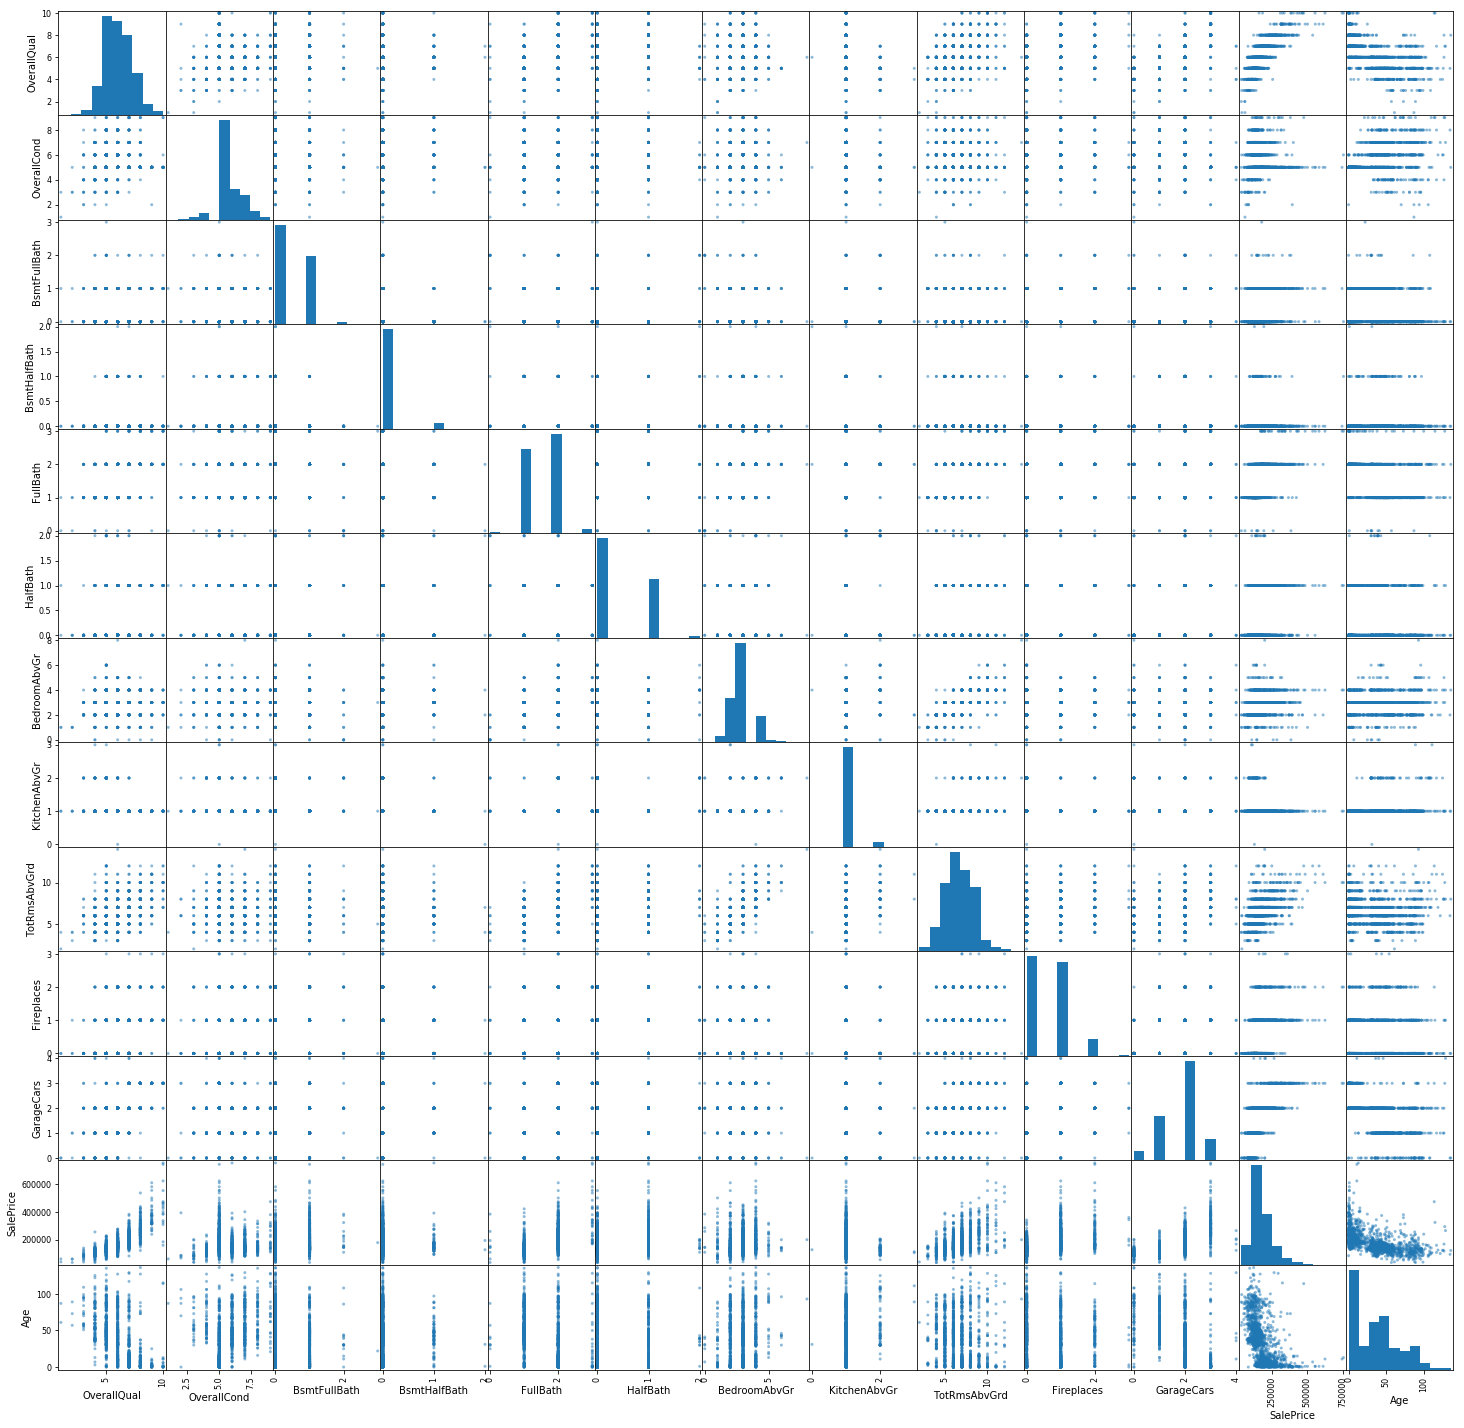

In [4]:
#Scatterplot matrix
#import seaborn as sns
#sns.pairplot(df)
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(25, 25))
plt.show()

#### b) Compute the matrix of correlations

In [5]:
#Correlation matrix
df.corr()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice,Age
OverallQual,1.000000,-0.091932,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.790982,-0.572629
OverallCond,-0.091932,1.000000,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.077856,0.377325
BsmtFullBath,0.111098,-0.054942,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.131881,0.227122,-0.184362
BsmtHalfBath,-0.040150,0.117821,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.020891,-0.016844,0.036060
FullBath,0.550600,-0.194149,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.469672,0.560664,-0.468403
HalfBath,0.273458,-0.060769,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.219178,0.284108,-0.242728
BedroomAbvGr,0.101676,0.012980,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.086106,0.168213,0.068960
KitchenAbvGr,-0.183882,-0.087001,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.050634,-0.135907,0.175918
TotRmsAbvGrd,0.427452,-0.057583,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.362289,0.533723,-0.096955
Fireplaces,0.396765,-0.023820,0.137928,0.028976,0.243671,0.203649,0.107570,-0.123936,0.326114,1.000000,0.300789,0.466929,-0.148544


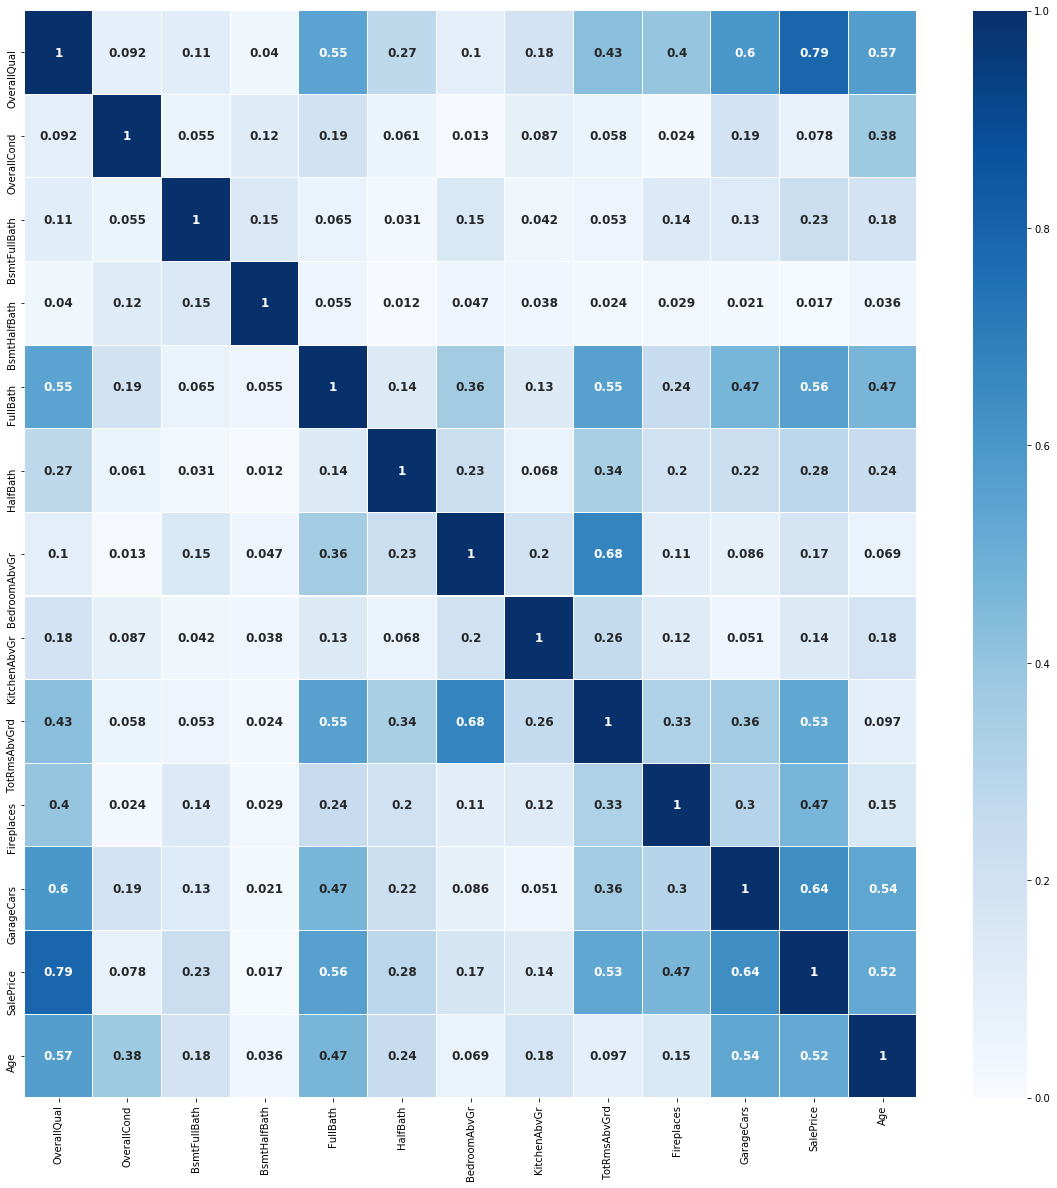

In [6]:
#Heatmap for correlation matrix
#import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
correlations = df.corr()
correlation = abs(correlations)
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, cmap = "Blues", linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':12,'weight':'bold'})
plt.show()

#### c) Preform a MLR model
Yes, there is a relationship between the preditors and the response.
With the help of statsmodels.api, I can see the F statistic equals 375.4, which is very significant. Thus, I can say that not all of the regression coefficients are zero, i.e. there is a relationship between the preditors and the response.

The coefficient for age variable indicates that when age increases by 1 unit, sale price will decrease by 248.83 units.

In [7]:
#MLR
from sklearn.linear_model import LinearRegression
Y = df.loc[:, 'SalePrice'].values
X = df.drop('SalePrice', 1)
features = X.columns
lr_model = LinearRegression()
lr_model.fit(X, Y)
Y_pred = lr_model.predict(X)
print('Intercept:\n', lr_model.intercept_)
print('Coefficients:\n', lr_model.coef_)

Intercept:
 -83029.36193718042
Coefficients:
 [ 23140.5775519    4340.81716369  21740.62927048  10236.97404143
  13417.13566671    239.55779176  -9599.11967007 -30303.00735859
  15129.23175193  12668.63436142  16766.93704285   -248.83374056]


In [8]:
#Coefficients for each feature
estimation = list(zip(features,lr_model.coef_))
Estimation = pd.DataFrame(estimation, columns = ['Features', 'Coefficients'])
Estimation

,Features,Coefficients
0,OverallQual,23140.577552
1,OverallCond,4340.817164
2,BsmtFullBath,21740.629270
3,BsmtHalfBath,10236.974041
4,FullBath,13417.135667
5,HalfBath,239.557792
6,BedroomAbvGr,-9599.119670
7,KitchenAbvGr,-30303.007359
8,TotRmsAbvGrd,15129.231752
9,Fireplaces,12668.634361


In [9]:
#Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
#from sklearn.feature_selection import f_regression

print("Mean squared error: %.6f" % mean_squared_error(Y, Y_pred))
print('R square score: %.6f' % r2_score(Y, Y_pred))
print('Explained variance score: %.6f' % explained_variance_score(Y, Y_pred))
#print('F statistic:\n', f_regression(X, Y))

Mean squared error: 1533199019.925050
R square score: 0.756897
Explained variance score: 0.756897


In [10]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model = sm.OLS(Y, X_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     375.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:38:30   Log-Likelihood:                -17512.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1447   BIC:                         3.512e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.303e+04   1.03e+04     -8.076      0.000   -1.03e+05   -6.29e+04
OverallQual   2.314e+04   1197.680     19.321      0.000    2.08e+04    2.55e+04
OverallCond   4340.8172   1035.881      4.190      0.000    2308.828    6372.806
BsmtFullBath  2.174e+04   2130.045     10.207      0.000    1.76e+04    2.59e+04
BsmtHalfBath  1.024e+04   4429.582      2.311      0.021    1547.884    1.89e+04
FullBath      1.342e+04   2825.199      4.749      0.000    7875.211     1.9e+04
HalfBath       239.5578   2329.340      0.103      0.918   -4329.687    4808.803
BedroomAbvGr -9599.1197   1841.241     -5.213      0.000   -1.32e+04   -5987.332
KitchenAbvGr  -3.03e+04   5344.862     -5.670      0.000   -4.08e+04   -1.98e+04
TotRmsAbvGrd  1.513e+04   1159.759     13.045      0.000    1.29e+04    1.74e+04
Fireplaces    1.267e+04   1836.603      6.898      0.000    9065.946    1.63e+04
GarageCars    1.677e+04   1873.620      8.949      0.000    1.31e+04    2.04e+04
Age           -248.8337     53.594     -4.643      0.000    -353.964    -143.703
==============================================================================
Omnibus:                      704.691   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15758.952
Skew:                           1.733   Prob(JB):                         0.00
Kurtosis:                      18.718   Cond. No.                         506.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### d) Trying different transformation of the variables
Here, I used x<sup>2</sup> and x<sup>3</sup> as the new transformation to try MLR. I found the sizes of coefficients are smaller than using x in MLR. Also, the R square improves, though not by much (around 0.04), which means the model fits the data better than before. Aftering using the new transformations, more variance in response variable has been explained by the predictors.

The R square values of using x<sup>2</sup> and x<sup>3</sup> are almost the same, which means the model didn't improve when changing x<sup>2</sup> into x<sup>3</sup>.

In [11]:
#Generate X_square
import numpy as np

X_square = X.transform(np.square)
X_square

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,Age
0,49,25,1,0,4,1,9,1,64,0,4,25
1,36,64,0,1,4,0,9,1,36,1,4,961
2,49,25,1,0,4,1,9,1,36,1,4,49
3,49,25,1,0,1,0,9,1,49,1,9,8281
4,64,25,1,0,4,1,16,1,81,1,9,64
5,25,25,1,0,1,1,1,1,25,0,4,256
6,64,25,1,0,4,0,9,1,49,1,4,9
7,49,36,1,0,4,1,9,1,49,4,4,1296
8,49,25,0,0,4,0,4,4,64,4,4,5929
9,25,36,1,0,1,0,4,4,25,4,1,4761


In [12]:
lr_model_1 = LinearRegression()
lr_model_1.fit(X_square, Y)
Y_pred_1 = lr_model_1.predict(X_square)
print('Intercept:\n', lr_model_1.intercept_)
print('Coefficients:\n', lr_model_1.coef_)

Intercept:
 25616.542618117266
Coefficients:
 [ 2.07475736e+03  4.50268604e+02  1.38444471e+04  5.99836970e+03
  4.67191892e+03 -4.18393304e+02 -8.59389540e+02 -1.08746422e+04
  8.50508227e+02  6.35781821e+03  6.17582830e+03 -2.55569178e+00]


In [13]:
#Evaluation metrics
print("Mean squared error: %.6f" % mean_squared_error(Y, Y_pred_1))
print('R square: %.6f' % r2_score(Y, Y_pred_1))
print('Explained variance score: %.6f' % explained_variance_score(Y, Y_pred_1))
#print('F statistic:\n', f_regression(X_square, Y))

Mean squared error: 1320023659.521028
R square: 0.790698
Explained variance score: 0.790698


In [14]:
X_square = sm.add_constant(X_square)
model_square = sm.OLS(Y, X_square).fit()
model_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     455.5
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:39:20   Log-Likelihood:                -17402.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1447   BIC:                         3.490e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.562e+04   4460.304      5.743      0.000    1.69e+04    3.44e+04
OverallQual   2074.7574     84.136     24.660      0.000    1909.717    2239.798
OverallCond    450.2686     78.460      5.739      0.000     296.360     604.177
BsmtFullBath  1.384e+04   1553.732      8.910      0.000    1.08e+04    1.69e+04
BsmtHalfBath  5998.3697   3614.378      1.660      0.097   -1091.611    1.31e+04
FullBath      4671.9189    765.558      6.103      0.000    3170.198    6173.640
HalfBath      -418.3933   1802.997     -0.232      0.817   -3955.161    3118.374
BedroomAbvGr  -859.3895    277.882     -3.093      0.002   -1404.485    -314.294
KitchenAbvGr -1.087e+04   1581.845     -6.875      0.000    -1.4e+04   -7771.687
TotRmsAbvGrd   850.5082     74.806     11.370      0.000     703.769     997.248
Fireplaces    6357.8182    890.721      7.138      0.000    4610.576    8105.060
GarageCars    6175.8283    499.661     12.360      0.000    5195.690    7155.967
Age             -2.5557      0.418     -6.108      0.000      -3.376      -1.735
==============================================================================
Omnibus:                      450.488   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17077.758
Skew:                           0.728   Prob(JB):                         0.00
Kurtosis:                      19.692   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_cube = np.power(X, 3)
X_cube

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,Age
0,343,125,1,0,8,1,27,1,512,0,8,125
1,216,512,0,1,8,0,27,1,216,1,8,29791
2,343,125,1,0,8,1,27,1,216,1,8,343
3,343,125,1,0,1,0,27,1,343,1,27,753571
4,512,125,1,0,8,1,64,1,729,1,27,512
5,125,125,1,0,1,1,1,1,125,0,8,4096
6,512,125,1,0,8,0,27,1,343,1,8,27
7,343,216,1,0,8,1,27,1,343,8,8,46656
8,343,125,0,0,8,0,8,8,512,8,8,456533
9,125,216,1,0,1,0,8,8,125,8,1,328509


In [16]:
lr_model_2 = LinearRegression()
lr_model_2.fit(X_cube, Y)
Y_pred_2 = lr_model_2.predict(X_cube)
print('Intercept:\n', lr_model_2.intercept_)
print('Coefficients:\n', lr_model_2.coef_)

Intercept:
 73877.54511616236
Coefficients:
 [ 2.28804084e+02  4.82594635e+01  4.66077504e+03  9.16263527e+02
  2.05905900e+03  2.06260054e+02 -1.05000939e+02 -4.06121260e+03
  5.97944281e+01  2.41415851e+03  1.85471043e+03 -3.18730403e-02]


In [17]:
#Evaluation metrics
print("Mean squared error: %.6f" % mean_squared_error(Y, Y_pred_2))
print('R square: %.6f' % r2_score(Y, Y_pred_2))
print('Explained variance score: %.6f' % explained_variance_score(Y, Y_pred_2))
#print('F statistic:\n', f_regression(X_cube, Y))

Mean squared error: 1320142137.762455
R square: 0.790679
Explained variance score: 0.790679


In [18]:
X_cube= sm.add_constant(X_cube)
model_cube = sm.OLS(Y, X_cube).fit()
model_cube.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     455.5
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:39:59   Log-Likelihood:                -17402.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1447   BIC:                         3.490e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.388e+04   2815.284     26.242      0.000    6.84e+04    7.94e+04
OverallQual    228.8041      7.902     28.956      0.000     213.304     244.304
OverallCond     48.2595      8.101      5.957      0.000      32.368      64.151
BsmtFullBath  4660.7750    861.128      5.412      0.000    2971.582    6349.968
BsmtHalfBath   916.2635   2629.931      0.348      0.728   -4242.622    6075.149
FullBath      2059.0590    262.481      7.845      0.000    1544.176    2573.942
HalfBath       206.2601   1218.138      0.169      0.866   -2183.245    2595.765
BedroomAbvGr  -105.0009     48.277     -2.175      0.030    -199.700     -10.301
KitchenAbvGr -4061.2126    616.193     -6.591      0.000   -5269.940   -2852.485
TotRmsAbvGrd    59.7944      6.057      9.872      0.000      47.913      71.676
Fireplaces    2414.1585    391.905      6.160      0.000    1645.395    3182.922
GarageCars    1854.7104    146.138     12.691      0.000    1568.045    2141.376
Age             -0.0319      0.004     -8.698      0.000      -0.039      -0.025
==============================================================================
Omnibus:                      352.496   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17387.752
Skew:                          -0.157   Prob(JB):                         0.00
Kurtosis:                      19.903   Cond. No.                     1.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 3. Using simulated data to fit regression model.
#### a) Create a vector, x, containing 100 observations drawn from a N (0, 1) distribution

In [19]:
np.random.seed(7)
x = np.random.normal(0, 1, (100, 1))
eps = np.random.normal(0, 0.5, (100, 1))
print(x)

[[ 1.69052570e+00]
 [-4.65937371e-01]
 [ 3.28201637e-02]
 [ 4.07516283e-01]
 [-7.88923029e-01]
 [ 2.06557291e-03]
 [-8.90385858e-04]
 [-1.75472431e+00]
 [ 1.01765801e+00]
 [ 6.00498516e-01]
 [-6.25428974e-01]
 [-1.71548261e-01]
 [ 5.05299374e-01]
 [-2.61356415e-01]
 [-2.42749079e-01]
 [-1.45324141e+00]
 [ 5.54580312e-01]
 [ 1.23880905e-01]
 [ 2.74459924e-01]
 [-1.52652453e+00]
 [ 1.65069969e+00]
 [ 1.54335535e-01]
 [-3.87139943e-01]
 [ 2.02907222e+00]
 [-4.53860299e-02]
 [-1.45067870e+00]
 [-4.05227855e-01]
 [-2.28831510e+00]
 [ 1.04939655e+00]
 [-4.16474319e-01]
 [-7.42553525e-01]
 [ 1.07247013e+00]
 [-1.65107559e+00]
 [ 5.35429356e-01]
 [-2.06441480e+00]
 [-6.62159340e-01]
 [-1.20421985e+00]
 [ 1.46197563e+00]
 [ 1.76616088e+00]
 [-3.29413752e-01]
 [ 8.40733242e-01]
 [-1.79986401e-01]
 [ 5.68061887e-01]
 [-7.52837196e-01]
 [-1.70833920e+00]
 [-1.80309866e+00]
 [ 3.83121852e-01]
 [ 2.24759505e+00]
 [ 2.69411631e-01]
 [-5.24604619e-01]
 [ 1.91201886e+00]
 [ 2.37301847e-01]
 [ 1.0143398

#### b) Create another vector, eps, containing 100 observations drawn from a N(0,0.25) distribution.

In [20]:
print(eps)

[[-0.432245  ]
 [ 0.18718517]
 [ 0.19577285]
 [-0.72156083]
 [ 0.2431676 ]
 [-0.28473614]
 [ 0.71336058]
 [ 0.07842199]
 [ 0.85886502]
 [-0.2290634 ]
 [-0.14399193]
 [ 0.14990418]
 [ 0.52797415]
 [ 0.28294124]
 [-0.61676197]
 [ 0.09145035]
 [ 0.01112237]
 [-0.2145343 ]
 [-0.32405265]
 [ 0.87378862]
 [-0.19519324]
 [-0.42296132]
 [ 0.31855642]
 [ 0.06531149]
 [-0.03790693]
 [ 0.39065091]
 [ 0.24431271]
 [ 0.181095  ]
 [ 0.48210024]
 [ 0.14181821]
 [-0.30846097]
 [-0.18114111]
 [-0.26048617]
 [ 0.10486103]
 [-0.53899245]
 [-0.91621298]
 [ 0.04407746]
 [-0.66826027]
 [-0.97598905]
 [ 0.18666539]
 [-0.3555266 ]
 [ 0.24806271]
 [-0.26542688]
 [-0.56098119]
 [-0.62175876]
 [-0.25746361]
 [-0.1366914 ]
 [-0.41173004]
 [-0.14055396]
 [-0.76805115]
 [ 0.00724447]
 [-0.89682437]
 [-0.09692816]
 [ 0.34864705]
 [ 0.5459694 ]
 [ 0.85719012]
 [-0.77814382]
 [ 0.3793626 ]
 [ 0.6031411 ]
 [ 0.49027849]
 [-0.46466191]
 [ 0.20589842]
 [ 0.93002784]
 [-0.74863682]
 [ 0.23816885]
 [ 0.55614524]
 [-0.34829

#### c) Generate a vector y according to the model Y =−1+0.5X+ε
The length of y is 100.<br>
$\beta_0$ = -1<br>
$\beta_1$ = 0.5

In [21]:
y= -1 + 0.5*x +eps
print(y.shape)

(100, 1)


#### d) Create a scatterplot displaying the relationship between x and y.
According to the scatterplot, it seems that there is a linear relationship between x and y. y increases with the increase in x.

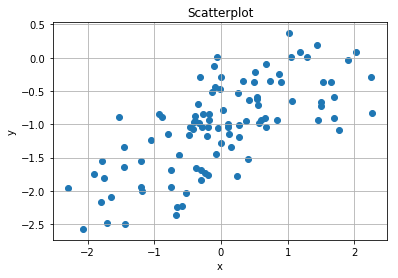

In [22]:
plt.scatter(x, y)
plt.title("Scatterplot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

#### e) Fit a least squares linear model to predict y using x. 
The mean square error is pretty small, but the R square is not very good (0.491), indicating that this model can only explain 49.1% of the variability in y, which means the model doesn't fit the data very well.

$\hat\beta_0$ and $\hat\beta_1$ are both very close to $\beta_0$ and $\beta_1$, respectively, with differences less than 0.04 for both.

In [23]:
lr_model_3 = LinearRegression()
lr_model_3.fit(x, y)
y_pred = lr_model_3.predict(x)
print('Intercept:\n', lr_model_3.intercept_)
print('Coefficients:\n', lr_model_3.coef_)

Intercept:
 [-1.03352647]
Coefficients:
 [[0.4609706]]


In [24]:
print("Mean squared error: %.6f" % mean_squared_error(y, y_pred))
print('R square: %.6f' % r2_score(y, y_pred))
print('Explained variance score: %.6f' % explained_variance_score(y, y_pred))

Mean squared error: 0.228628
R square: 0.490989
Explained variance score: 0.490989


In [25]:
x_sm = sm.add_constant(x)
model_1 = sm.OLS(y, x_sm).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     94.53
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           4.84e-16
Time:                        21:43:47   Log-Likelihood:                -68.111
No. Observations:                 100   AIC:                             140.2
Df Residuals:                      98   BIC:                             145.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0335      0.048    -21.396      0.000      -1.129      -0.938
x1             0.4610      0.047      9.723      0.000       0.367       0.555
==============================================================================
Omnibus:                        2.826   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.819
Skew:                          -0.077   Prob(JB):                        0.403
Kurtosis:                       2.358   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### f) Fit a polynomial regression model that predicts y using x and x<sup>2</sup>.
According to my results, there is evidence shows the quadratic term improves the model fit. R square has improved, (from 0.491 to 0.510), which means x<sup>2</sup> helps to explain more variability in y.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x)
print(x.shape)
print(x_poly.shape)

(100, 1)
(100, 2)


In [27]:
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_polyPred = poly_model.predict(x_poly)
print('Intercept:\n', poly_model.intercept_)
print('Coefficients:\n', poly_model.coef_)

Intercept:
 [-0.96180808]
Coefficients:
 [[ 0.46594364 -0.06915228]]


In [28]:
print("Mean squared error: %.6f" % mean_squared_error(y, y_polyPred))
print('Variance score: %.6f' % r2_score(y, y_polyPred))
print('Explained variance score: %.6f' % explained_variance_score(y, y_polyPred))

Mean squared error: 0.220134
Variance score: 0.509898
Explained variance score: 0.509898


In [29]:
x_poly_sm = sm.add_constant(x_poly)
model_poly = sm.OLS(y, x_poly_sm).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     50.46
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           9.53e-16
Time:                        21:48:52   Log-Likelihood:                -66.218
No. Observations:                 100   AIC:                             138.4
Df Residuals:                      97   BIC:                             146.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9618      0.060    -15.933      0.000      -1.082      -0.842
x1             0.4659      0.047      9.949      0.000       0.373       0.559
x2            -0.0692      0.036     -1.935      0.056      -0.140       0.002
==============================================================================
Omnibus:                        2.425   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.741
Skew:                          -0.121   Prob(JB):                        0.419
Kurtosis:                       2.401   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### g) Generate data with less noise to perform the model.
After decreasing the variance of the normal distribution to generate $\varepsilon$, a more obvious linearn trend can be seen on the scallter plot of x and y.

After using linear regression to train the model, $\hat\beta_0$ and $\hat\beta_1$ are even closer to $\beta_0$ and $\beta_1$, respectively, with differences around 0.01 for both. Both R square and explained variance score are very close to 1, which means this model fits the data pretty well.

Fitting a polynomial regression model, however, only lead to an increase of 0.001 in R square, which means it only helps a little bit in improving the model.

In [30]:
#Decrease the variance of the normal distribution
np.random.seed(2)
eps1 = np.random.normal(0, 0.1, (100, 1))
print(eps1)

[[-4.16757847e-02]
 [-5.62668272e-03]
 [-2.13619610e-01]
 [ 1.64027081e-01]
 [-1.79343559e-01]
 [-8.41747366e-02]
 [ 5.02881417e-02]
 [-1.24528809e-01]
 [-1.05795222e-01]
 [-9.09007615e-02]
 [ 5.51454045e-02]
 [ 2.29220801e-01]
 [ 4.15393930e-03]
 [-1.11792545e-01]
 [ 5.39058321e-02]
 [-5.96159700e-02]
 [-1.91304965e-03]
 [ 1.17500122e-01]
 [-7.47870949e-02]
 [ 9.02525097e-04]
 [-8.78107893e-02]
 [-1.56434170e-02]
 [ 2.56570452e-02]
 [-9.88779049e-02]
 [-3.38821966e-02]
 [-2.36184031e-02]
 [-6.37655012e-02]
 [-1.18761229e-01]
 [-1.42121723e-01]
 [-1.53495196e-02]
 [-2.69056960e-02]
 [ 2.23136679e-01]
 [-2.43476758e-01]
 [ 1.12726505e-02]
 [ 3.70444537e-02]
 [ 1.35963386e-01]
 [ 5.01857207e-02]
 [-8.44213704e-02]
 [ 9.76147160e-07]
 [ 5.42352572e-02]
 [-3.13508197e-02]
 [ 7.71011738e-02]
 [-1.86809065e-01]
 [ 1.73118467e-01]
 [ 1.46767801e-01]
 [-3.35677339e-02]
 [ 6.11340780e-02]
 [ 4.79705919e-03]
 [-8.29135289e-02]
 [ 8.77102184e-03]
 [ 1.00036589e-01]
 [-3.81092518e-02]
 [-3.7566942

In [31]:
y_new = -1 + 0.5*x +eps1
print(y_new.shape)

(100, 1)


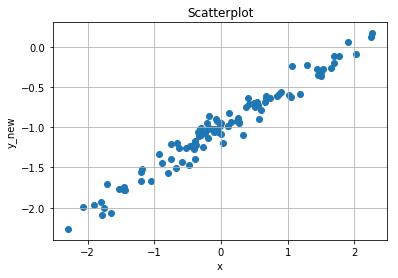

In [32]:
plt.scatter(x, y_new)
plt.title("Scatterplot")
plt.xlabel("x")
plt.ylabel("y_new")
plt.grid()
plt.show()

In [33]:
lr_model_4 = LinearRegression()
lr_model_4.fit(x, y_new)
y_new_pred = lr_model_4.predict(x)
print('Intercept:\n', lr_model_4.intercept_)
print('Coefficients:\n', lr_model_4.coef_)
print("Mean squared error: %.6f" % mean_squared_error(y_new, y_new_pred))
print('R square: %.6f' % r2_score(y_new, y_new_pred))
print('Explained variance score: %.6f' % explained_variance_score(y_new, y_new_pred))

Intercept:
 [-1.01043404]
Coefficients:
 [[0.50496673]]
Mean squared error: 0.010729
R square: 0.961038
Explained variance score: 0.961038


In [34]:
model_2 = sm.OLS(y_new, x_sm).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2417.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           7.16e-71
Time:                        21:50:12   Log-Likelihood:                 84.847
No. Observations:                 100   AIC:                            -165.7
Df Residuals:                      98   BIC:                            -160.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0104      0.010    -96.564      0.000      -1.031      -0.990
x1             0.5050      0.010     49.166      0.000       0.485       0.525
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.430
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.665
Skew:                          -0.178   Prob(JB):                        0.717
Kurtosis:                       2.821   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
poly_model_1 = LinearRegression()
poly_model_1.fit(x_poly, y_new)
y_polyPred_1 = poly_model_1.predict(x_poly)
print('Intercept:\n', poly_model_1.intercept_)
print('Coefficients:\n', poly_model_1.coef_)
print("Mean squared error: %.6f" % mean_squared_error(y_new, y_polyPred_1))
print('R square: %.6f' % r2_score(y_new, y_polyPred_1))
print('Explained variance score: %.6f' % explained_variance_score(y_new, y_polyPred_1))

Intercept:
 [-0.99807263]
Coefficients:
 [[ 0.50582389 -0.01191911]]
Mean squared error: 0.010477
R square: 0.961954
Explained variance score: 0.961954


In [36]:
model_poly_1 = sm.OLS(y_new, x_poly_sm).fit()
model_poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1226.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           1.40e-69
Time:                        21:50:19   Log-Likelihood:                 86.037
No. Observations:                 100   AIC:                            -166.1
Df Residuals:                      97   BIC:                            -158.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9981      0.013    -75.788      0.000      -1.024      -0.972
x1             0.5058      0.010     49.509      0.000       0.486       0.526
x2            -0.0119      0.008     -1.528      0.130      -0.027       0.004
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.971
Skew:                          -0.239   Prob(JB):                        0.615
Kurtosis:                       2.934   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reference 
[1] James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.<br>
[2] API design for machine learning software: experiences from the scikit-learn project, Buitinck et al., 2013.